# New York Housing Data EDA and Regression
#### By: Justin Haysbert
[Github](https://justinhaysbert.github.io/)

## Project Goals

Justin Haysbert will investigate a comprehensive dataset encompassing New York housing details. This dataset includes information on broker titles, house types, prices, square footage, addresses, and more. These diverse data points promise valuable insights into the dynamic landscape of the New York housing market, shedding light on the factors that contribute to a property's perceived value. I plan to run EDA and Regression models on this dataset to extract these insights.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [5]:
!git clone https://github.com/JustinHaysbert/New-York-Housing-Project.git

Cloning into 'New-York-Housing-Project'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 265.76 KiB | 5.54 MiB/s, done.


In [6]:
!ls New-York-Housing-Project

NY-House-Dataset.csv  README.md


# Dataset

I am considering utilizing the New York Housing dataset from [Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market/code), which is upvoted for its high usability ratings, with the intention of obtaining promising insights into the NY housing market. This dataset encompasses property listings across New York, featuring key information such as broker title, house type, price, bedroom and bathroom counts, square footage, address details (including state, main address, administrative area, locality, sublocality, street name, formal address), latitude, and longitude. My objective in using this dataset is to gain some insights into the market, specifically identifying the types of houses listed at the highest price points and discerning the attributes that contribute to their perceived value. I aim to determine the key factors that serve as the most significant determinants of a high-priced house in this market.

I will first format and clean the data properly. The I intend to run some general data analysis on it to see if I cant find some patterns or predictors of price. I will undergo a bit of data visualization and try to find some nice visualizations to display the data in a digestistable way. Then I have hopes to format the data for some regression analysis using sci-kit learn models.

I want to train a regrerssion model that can predict the price of a home based on the most deterministic variables. I want to try a couple of different regression models that I am familiar with such as linear regression, polynomial regression, multiple regression, lasso regression, ridge regression, SVR. Im not sure yet how many models I will try out but I want to see what performs the best. I also want to utilize ensemble ML techniques to see If I can get more accurate predictions.

In the end I hope to create a model that can give an accurate prediction of house price based on the data provided.


# Work Plan
Because I am enrolled in the graduate section I have no partner however, I still think it's important to come up with a plan for how I will complete work.

I will store all of my code in the [github](https://github.com/JustinHaysbert/New-York-Housing-Project.git) I have created for this project.

I plan to work at least 3-4 hours a week on the project first starting with data cleaning and formating. Then I will start to dive into some basic EDA. After this I hope to begin implementing some Models. After my first implementation of modeling, I plan to pick the best ones and to use them to implement some kind of ensemble learning.  

I will regularly attend office hourse to ensure that the scope of my project is realistic and that I am pace to meet milestones. Being that I have some experience in Machine Learning I want to leverage that to build some interesting predictive models. However if building multiple models seems unrealistic I may cut some of them out of the project to maintain scope.


# ETL

### Load in the dataset

In [7]:
housing=pd.read_csv('New-York-Housing-Project/NY-House-Dataset.csv')
housing

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


### Lets look at the details

In [8]:
housing.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [9]:
housing.set_index("ADDRESS").head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
ADDRESS,,,,,,,,,,,,,,,,
2 E 55th St Unit 803,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
Central Park Tower Penthouse-217 W 57th New York St Unit Penthouse,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
620 Sinclair Ave,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
2 E 55th St Unit 908W33,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
5 E 64th St,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


### Lets check for any null values

In [10]:
housing.isnull().sum()
#no null values in the dataset


BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

## Rename the columns because I don't like that they are in all caps

In [11]:
housing.rename(columns = {"BROKERTITLE": "broker",
                                    "TYPE": "type",
                                    "PRICE":"price",
                                    "BEDS":"beds",
                                    "PROPERTYSQFT":"sqft",
                                    "ADDRESS":"address",
                                    "STATE":"state",
                                    "MAIN_ADDRESS":"main address",
                                    "ADMINISTRATIVE_AREA_LEVEL_2":"aal",
                                    "LOCALITY":"locality",
                                    "SUBLOCALITY":"sublocality",
                                    "STREET_NAME":"street name",
                                    "LONG_NAME":"long name",
                                    "FORMATTED_ADDRESS":"formatted address",
                                    "LATITUDE":"latitude",
                                    "LONGITUDE":"longitude"
                                    }, inplace = True)

In [12]:
housing.head()

,broker,type,price,beds,BATH,sqft,address,state,main address,aal,locality,sublocality,street name,long name,formatted address,latitude,longitude
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [13]:
housing.dtypes

broker                object
type                  object
price                  int64
beds                   int64
BATH                 float64
sqft                 float64
address               object
state                 object
main address          object
aal                   object
locality              object
sublocality           object
street name           object
long name             object
formatted address     object
latitude             float64
longitude            float64
dtype: object

 don't think ill use these columns so I'm gonna drop them, but who knows I may change this later

In [14]:
housing = housing.drop(["street name", "long name", "formatted address", "aal", "state" ], axis=1)

In [15]:
housing.head()

,broker,type,price,beds,BATH,sqft,address,main address,locality,sublocality,latitude,longitude
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"2 E 55th St Unit 803New York, NY 10022",New York,Manhattan,40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,Central Park Tower Penthouse-217 W 57th New Yo...,New York,New York County,40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"620 Sinclair AveStaten Island, NY 10312",New York,Richmond County,40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"2 E 55th St Unit 908W33Manhattan, NY 10022",New York,New York County,40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"5 E 64th StNew York, NY 10065",New York,New York County,40.767224,-73.969856


Some pair plotting to look for visual correlations

This pair plot allows us to look at correleations between every variable in the dataset. It allow us to visualize any relationships that may be usefull to predicting trends within the data.

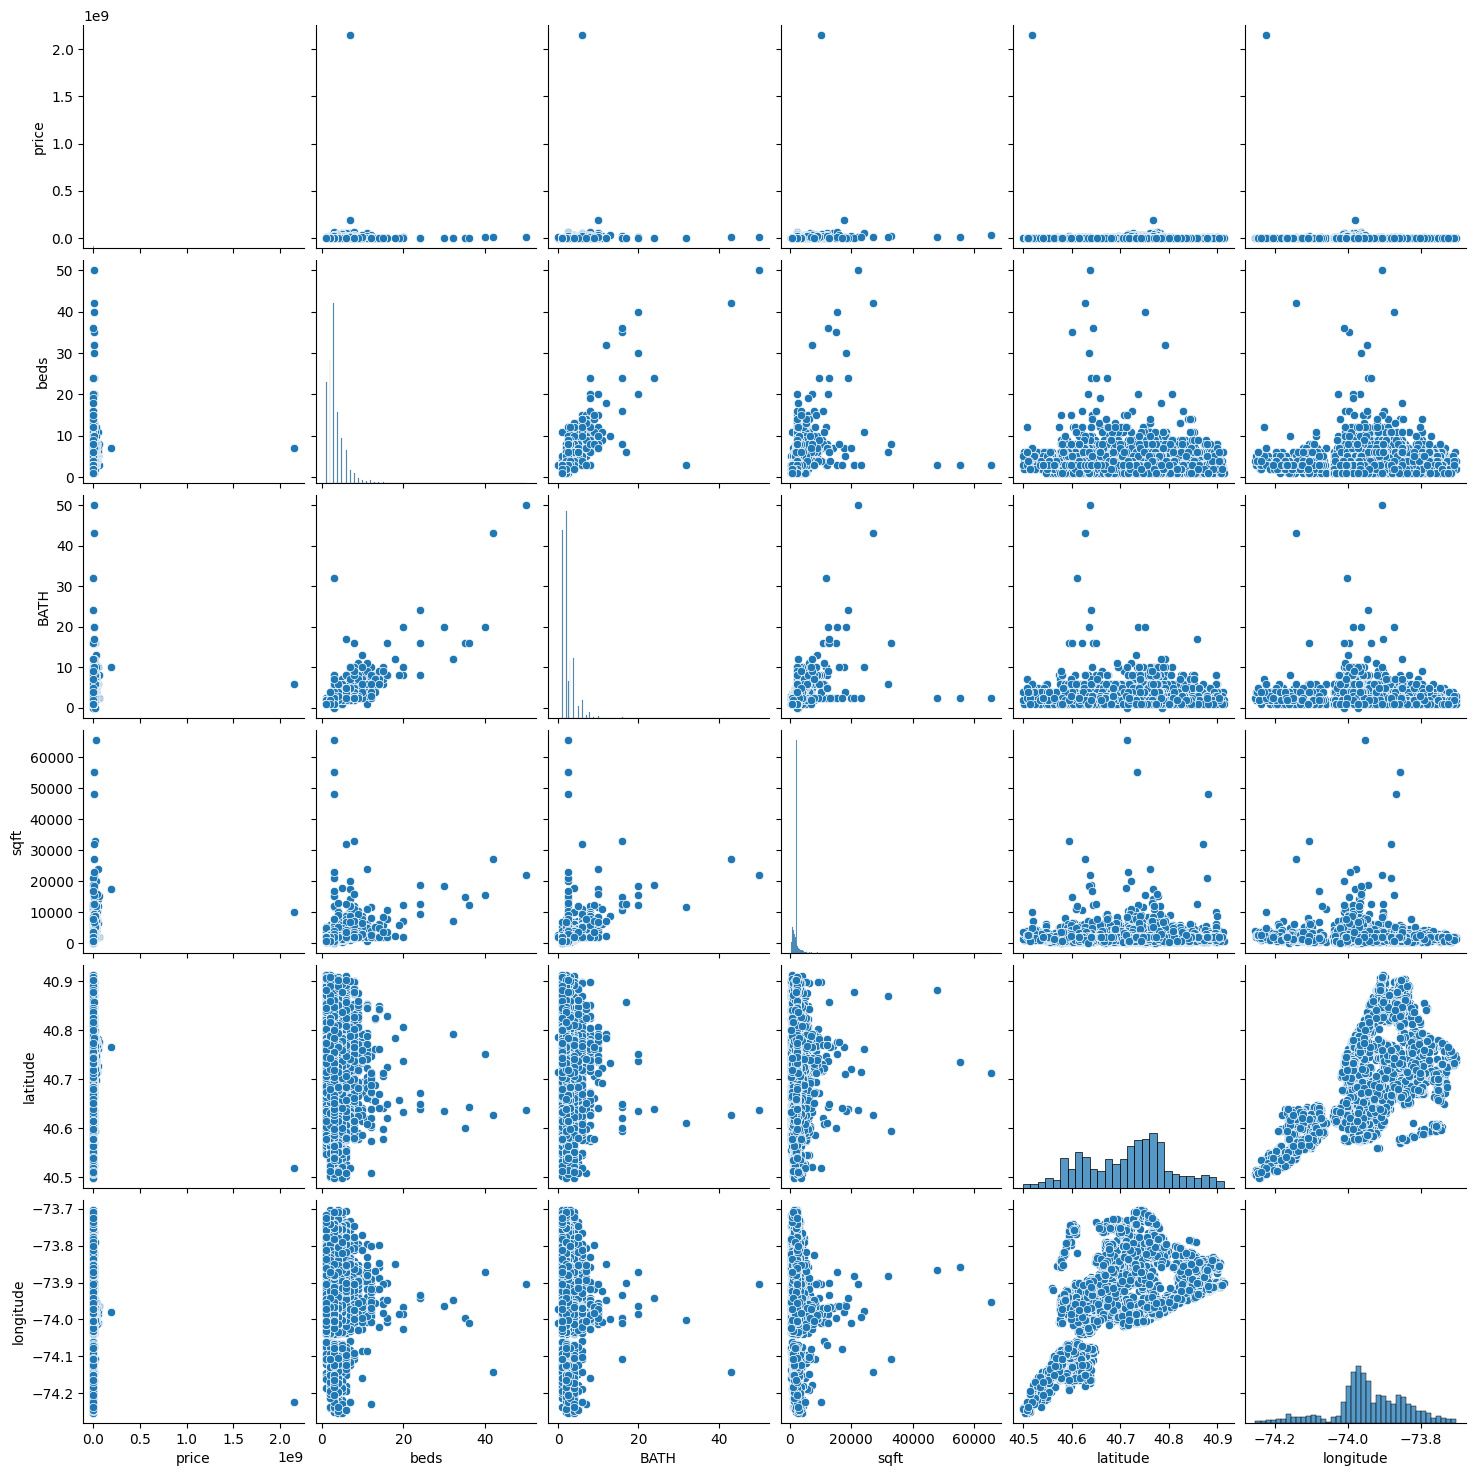

In [16]:
sns.pairplot(housing)


<Axes: xlabel='price'>

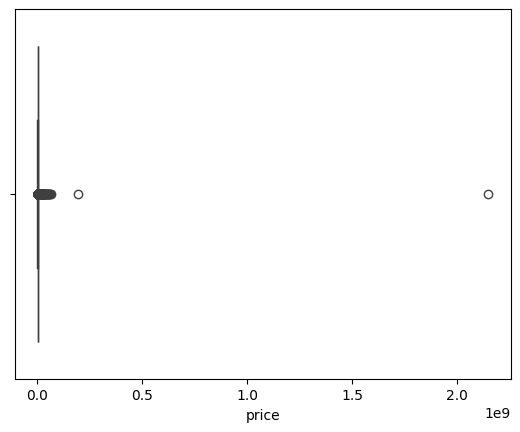

In [17]:
sns.boxplot(data=housing, x='price')

Woah some crazy outliers lets remove these!

In [18]:
lower_percentile = housing['price'].quantile(0.01)
upper_percentile = housing['price'].quantile(0.95)
lower_percentile
upper_percentile

6975000.0

In [19]:
housing = housing[(housing['price'] > lower_percentile) & (housing['price'] < upper_percentile)]

# EDA

Its time to take a closer look at this data and target important correlations

<Axes: xlabel='price'>

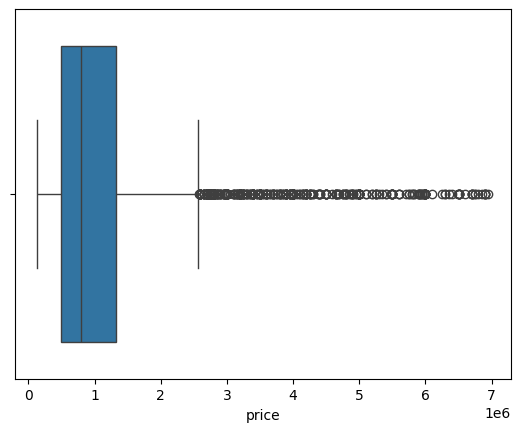

In [20]:
sns.boxplot(data=housing, x='price')


We can see here some details on the distribution of housing prices. It seems like our median sits somewhere between 500k and 1 million. We still have some outliers in the 2.5+ mil range so we will remove these as well.

In [21]:
lower_percentile = housing['price'].quantile(0.01)
upper_percentile = housing['price'].quantile(0.90)
lower_percentile
upper_percentile

2495000.0

In [22]:
housing = housing[(housing['price'] > lower_percentile) & (housing['price'] < upper_percentile)]

<Axes: xlabel='price'>

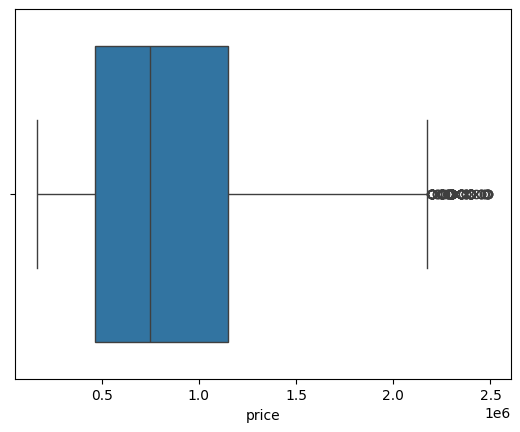

In [23]:
sns.boxplot(data=housing, x='price')

Heres a clean boxplot with no outliers, the removal of these outliers should give us a better model in the future

<Axes: xlabel='price', ylabel='type'>

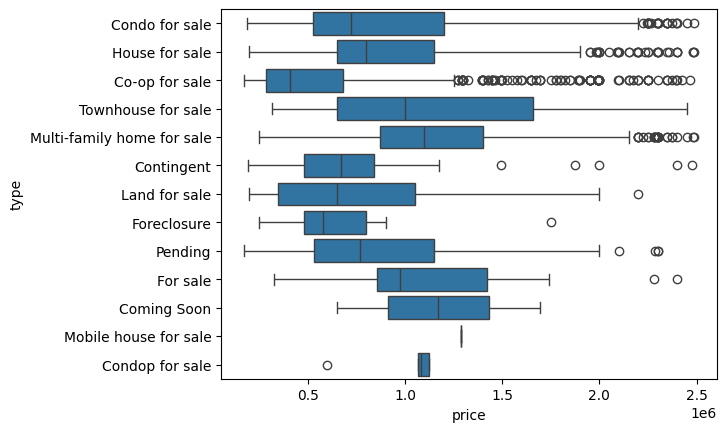

In [24]:
sns.boxplot(data=housing, x='price', y='type')

<Axes: xlabel='count', ylabel='type'>

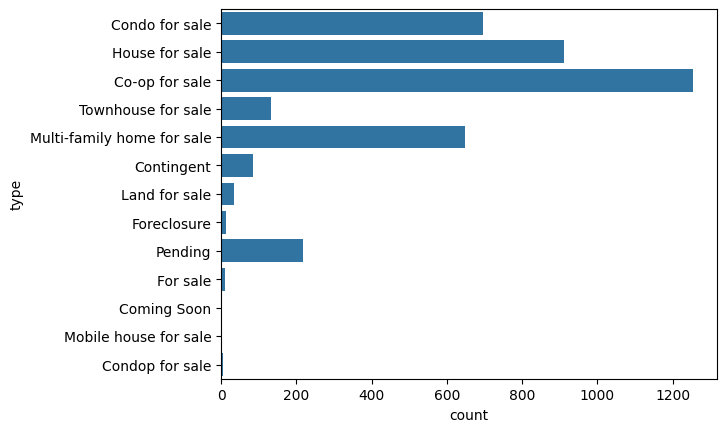

In [25]:
sns.countplot(data=housing, y='type')

This plot showing the count distribution of every type of home gives us insight into the most prevalent house types

<Axes: xlabel='longitude', ylabel='latitude'>

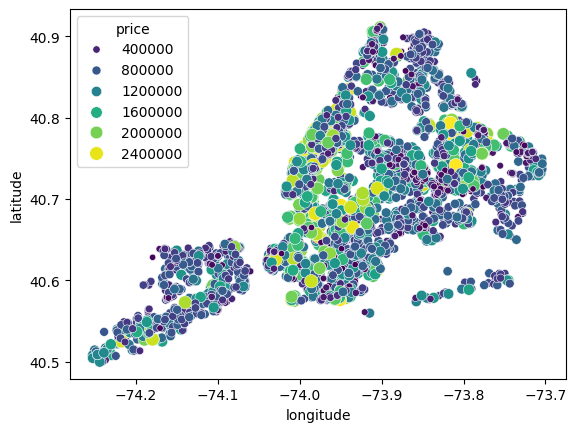

In [26]:
sns.scatterplot(data=housing, x = 'longitude', y='latitude', hue = 'price', size = 'price',sizes=(20, 100) ,palette="viridis")

In [27]:
import plotly.express as px
figure = px.scatter_mapbox(housing,
                        lat='latitude',
                        lon='longitude',
                        color='price',
                        size='price',
                        color_continuous_scale='viridis',
                        size_max=18,
                        zoom=10,
                        height=800,
                        width=800)

figure.update_layout(mapbox_style="open-street-map")
figure.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
figure.show()

This visualization of price based on latitude x longitude show that properties with high value tend to cluster together. It can be asssumed that these homes are located in higher priced neighborhoods

In [28]:
housing_corr = housing.drop(['broker','type','address', 'main address', 'locality',	'sublocality'], axis=1)

Dropping off some non numerical features for heatmap

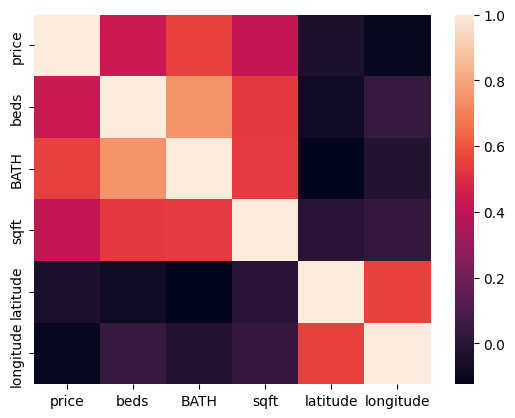

In [29]:
dataplot=sns.heatmap(housing_corr.corr())

This heatmap gives us insight to some correlations between numerical properties

We can see that the number of baths is highly correlated with the number of beds

We can also see that baths and beds are moderately correlated with sqft

# Takeaways and Questions

The next step is to build various models to predict the price of a home based on location(coordinates), sqft, bathroom count, and bedroom count

I will test multiple models such as linear regression,lasso regression, ridge regression, and k-nearest neighbors

Question 1.  What variables are the best and worst predictors of price?

Question 2. Can bedroom count, bathroom count, and sqft alone predict housing price, how big does the use of location effect the estmate

Question 3. what is the best model for predicting on this data


# Machine Learning Section

This is the final dataset for the ML modeling

In [30]:
housing_corr.head()

,price,beds,BATH,sqft,latitude,longitude
0,315000,2,2.0,1400.000000,40.761255,-73.974483
2,260000,4,2.0,2015.000000,40.541805,-74.196109
5,690000,5,2.0,4004.000000,40.674363,-73.958725
6,899500,2,2.0,2184.207862,40.809448,-73.946777
8,265000,1,1.0,750.000000,40.821586,-73.874089


80/20 train test split

In [31]:
from sklearn.model_selection import train_test_split


train_set, test_set = train_test_split(housing_corr, test_size=0.2, random_state=0)

In [32]:
housing_test_pd = pd.DataFrame(test_set)
housing_train_pd = pd.DataFrame(train_set)

In [33]:
housing_train = train_set.drop("price", axis=1)
housing_train_labels = train_set["price"].copy()

housing_test = test_set.drop("price", axis=1)
housing_test_labels = test_set["price"].copy()

Some transformations, scalars and pipelines

In [34]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scalar', StandardScaler()),
  ])
housing_num_tr_test = num_pipeline.fit_transform(housing_test)
housing_num_tr_train = num_pipeline.fit_transform(housing_train)

Ensure all our data is shaped properly

In [35]:
housing_num_tr_test.shape

(803, 5)

In [36]:
housing_num_tr_train.shape

(3208, 5)

In [37]:
housing_test_labels.shape

(803,)

In [38]:
housing_train_labels.shape

(3208,)

The first model that I will use will be plain linear regression

In [39]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_num_tr_train, housing_train_labels)

LinearRegression()

In [40]:
from sklearn.model_selection import cross_val_score
import numpy as np
lin_scores = cross_val_score(lin_reg, housing_num_tr_train, housing_train_labels,
                         scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)

def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("STD:", scores.std())
display_scores(lin_rmse_scores)

Scores: [433085.32155812 403438.21725386 428537.90291829 415511.93955392
 424777.54778529]
Mean: 421070.1858138954
STD: 10541.871136367174


In [41]:
test_predictions = lin_reg.predict(housing_num_tr_test)

# Evaluate the model's performance on the test set
from sklearn.metrics import mean_squared_error
test_rmse = np.sqrt(mean_squared_error(housing_test_labels, test_predictions))
print("Test RMSE:", test_rmse)

Test RMSE: 418046.4584717031


Linear regression gives a RMSE of 418046 meaning that on average our predictions are off by $418046. In comparision to the prices we are working with, that range from 400k to 2.4million, this rsme isnt completly horrible but still not good enough for actual use. Ideally when predicting house prices we want to be in a much tighter ballpark.

In [42]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_num_tr_train, housing_train_labels)
forest_reg_scores=cross_val_score(forest_reg, housing_num_tr_train, housing_train_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse=np.sqrt(-forest_reg_scores)
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("STD:", scores.std())
display_scores(forest_rmse)

Scores: [283618.18566187 270380.84114225 280618.48898793 274494.33703338
 297805.27514983 266011.94923511 272809.5767164  303851.34655884
 310095.35848269 292805.08619679]
Mean: 285249.04451651016
STD: 14365.837240900035


In [43]:
test_predictions = forest_reg.predict(housing_num_tr_test)

# Evaluate the model's performance on the test set
from sklearn.metrics import mean_squared_error
test_rmse = np.sqrt(mean_squared_error(housing_test_labels, test_predictions))
print("Test RMSE:", test_rmse)

Test RMSE: 304976.65859331394


Using a random forest regrssor model the rmse gets brough down to 304976. While this is still not the best it proves random forest is far superior of a model

Im now going to use gridsearch to see if I can find the best random forest parameters

In [44]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}
regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters)
clf.fit(housing_num_tr_train, housing_train_labels)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [45]:
clf.best_params_

{'max_depth': 4, 'n_estimators': 250}

In [46]:
best_model = clf.best_estimator_

In [47]:
test_predictions = best_model.predict(housing_num_tr_test)

# Compute RMSE
test_rmse = np.sqrt(mean_squared_error(housing_test_labels, test_predictions))

In [48]:
test_rmse

346802.8294555652

The best model gives a 346802 RMSE which is strange because vinilla random forest performed better. For sake of simplicity ill assume that the best model given by sci kit learn is more dependable.

I wanted to test whether or not the absence of latitude and longitude would affect the models predictions so i built a model without these features.

In [50]:
housing_corr.head()

,price,beds,BATH,sqft,latitude,longitude
0,315000,2,2.0,1400.000000,40.761255,-73.974483
2,260000,4,2.0,2015.000000,40.541805,-74.196109
5,690000,5,2.0,4004.000000,40.674363,-73.958725
6,899500,2,2.0,2184.207862,40.809448,-73.946777
8,265000,1,1.0,750.000000,40.821586,-73.874089


In [53]:
housing_new = housing_corr.drop(['latitude', 'longitude'], axis=1)

Dropping latitude and longitude

In [54]:
from sklearn.model_selection import train_test_split


train_set, test_set = train_test_split(housing_new, test_size=0.2, random_state=0)

In [55]:
housing_train = train_set.drop("price", axis=1)
housing_train_labels = train_set["price"].copy()

housing_test = test_set.drop("price", axis=1)
housing_test_labels = test_set["price"].copy()

In [56]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scalar', StandardScaler()),
  ])
housing_num_tr_test = num_pipeline.fit_transform(housing_test)
housing_num_tr_train = num_pipeline.fit_transform(housing_train)

In [57]:
housing_num_tr_test.shape

(803, 3)

In [58]:
housing_num_tr_train.shape

(3208, 3)

In [59]:
housing_test_labels.shape

(803,)

In [60]:
housing_train_labels.shape

(3208,)

In [61]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}
regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters)
clf.fit(housing_num_tr_train, housing_train_labels)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

Using gridsearch on random forest again

In [62]:
best_model = clf.best_estimator_

In [63]:
test_predictions = best_model.predict(housing_num_tr_test)

# Compute RMSE
test_rmse = np.sqrt(mean_squared_error(housing_test_labels, test_predictions))

In [64]:
test_rmse

404993.4834963244

Our predictions are significantly worse meaning that latitude and logitiude do play a significant role in predicting housing prices

# Final Results

Question 1. The best variables for predicting price are Latitude, longitude, Bath count, bedroom count, and sqft

Question 2. When running a model without the location features latitude and longitude the model performs significantly worse meaning that location plays a big role as a prediction of price

Question 3. The best model for predicting the NY housing price is Random forest regression with a RMSE of 304976.

# Final Thoughts

Being that the best model in this experiment yeilded a RSME of 304,976 its obvious that there is an issue. I do not believe the issue specifically lies within the models but in the data itself. The dataset used contained around 4000 datapoints. I beleive that this was not enough data to produce an accurate model for predicting housing price. I also believe that this data is not diverse enough and doesnt contain enough numerical features to output accurate predictions. In future tests it would be benificial to have a larger amount of data on the NY housing market as well as more features regaurding the home ammenites.